In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt #to put the heatmap
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier #Decision tree
from sklearn.tree import export_graphviz
import graphviz

In [2]:
df = pd.read_csv('/kaggle/input/apple-quality/apple_quality.csv')
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [3]:
#drop all the NA
df=df.dropna()
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [4]:
#Dropping the column 
df.drop('A_id', axis = 1, inplace = True)
df

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,bad
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good


In [5]:
#changing to a binary result
change = {
    'good': 1,
    'bad': 0
}
df.Quality = df.Quality.map(change)
df

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,1
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,0
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,1
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,0
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,1


<Axes: xlabel='Size', ylabel='Juiciness'>

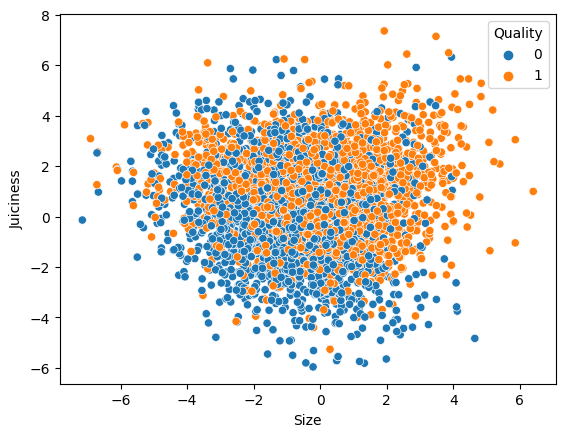

In [6]:
sns.scatterplot(x='Size', y='Juiciness',hue= "Quality", data = df)

# Correlation
* The correlation is low because all the variables are close to zero

In [7]:
correlation = df.corr()
correlation

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
Size,1.000000,-0.170702,-0.324680,0.169868,-0.018892,-0.134773,0.196218,0.244007
Weight,-0.170702,1.000000,-0.154246,-0.095882,-0.092263,-0.243824,0.016414,0.001421
Sweetness,-0.324680,-0.154246,1.000000,-0.037552,0.095882,-0.273800,0.085999,0.250998
Crunchiness,0.169868,-0.095882,-0.037552,1.000000,-0.259607,-0.201982,0.069943,-0.012376
Juiciness,-0.018892,-0.092263,0.095882,-0.259607,1.000000,-0.097144,0.248714,0.260223
Ripeness,-0.134773,-0.243824,-0.273800,-0.201982,-0.097144,1.000000,-0.202669,-0.264315
Acidity,0.196218,0.016414,0.085999,0.069943,0.248714,-0.202669,1.000000,-0.007697
Quality,0.244007,0.001421,0.250998,-0.012376,0.260223,-0.264315,-0.007697,1.000000


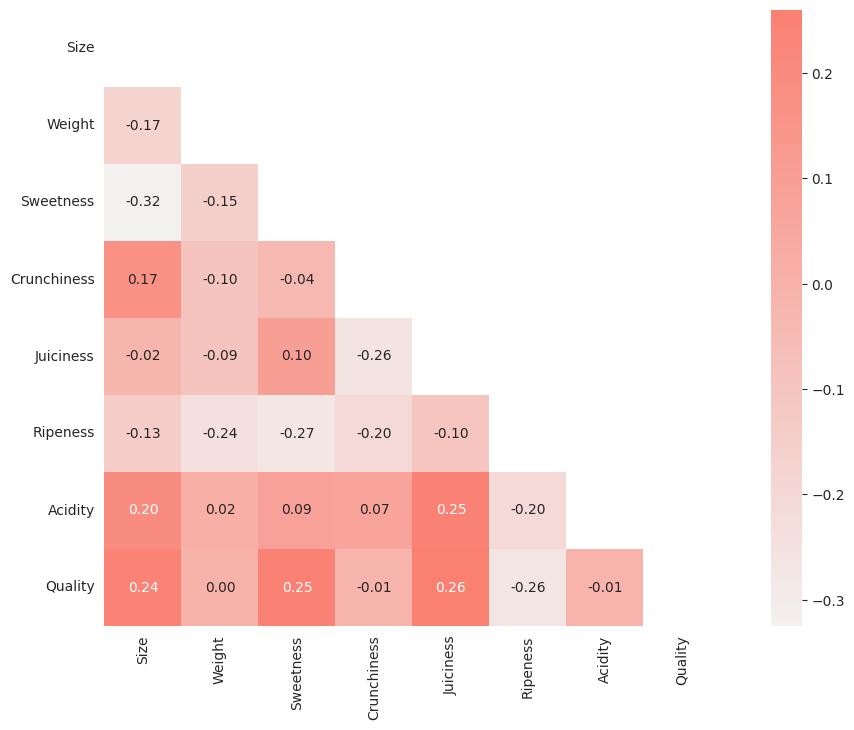

In [8]:
colors = sns.color_palette('light:salmon', as_cmap=True)
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
    f, ax = plt.subplots(figsize=(13,8))
    ax = sns.heatmap(correlation, cmap = colors, mask=mask, square=True, fmt='.2f', annot = True)

<Axes: >

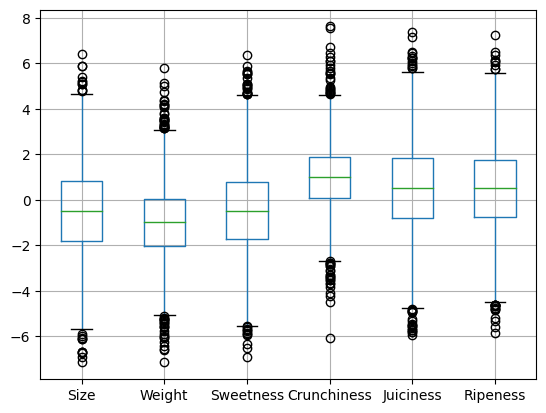

In [9]:
df.boxplot(['Size', 'Weight', 'Sweetness', 'Crunchiness',  'Juiciness', 'Ripeness'])

# Prepare the data to train it
* I need to Scale before and then use the SVC 

In [10]:
#independent variables
X = df.drop('Quality', axis = 1)

#dependent variable
y = df['Quality']

In [11]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scaledX = scale.fit_transform(X)

# Linear Support Vector Classifier
* It is a type of linear classification model in machine learning that is used for binary classification tasks
* Using the SVC is like a blackbox, because you can't understand the algorithm and why it decided to say yes or no.

In [12]:
SEED = 20
train_x, test_x, train_y, test_y = train_test_split(scaledX, y,
                                                   random_state = SEED, test_size = 0.25,
                                                   stratify = y)
print("We'll train with %d elements and we'll test with %d elements"%(len(train_x),len(test_x)))

model = LinearSVC()
model.fit(train_x, train_y)
prediction = model.predict(test_x)

accuracy = accuracy_score(test_y, prediction)*100
print("The accuracy was %.2f%%"%accuracy)


We'll train with 3000 elements and we'll test with 1000 elements
The accuracy was 76.40%


# Decision tree 
* Max depth = how deep is the tree
* We don't need to scale in a decision tree. So I will use the X that isn't Scaled.

In [13]:
!pip install graphviz==0.10
!apt-get install graphviz

  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1



graphviz is already the newest version (2.42.2-3build2).
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.


In [14]:
SEED = 20
train_x, test_x, train_y, test_y = train_test_split(X, y,
                                                   random_state = SEED, test_size = 0.25,
                                                   stratify = y)
print("We'll train with %d elements and we'll test with %d elements"%(len(train_x),len(test_x)))

model2 = DecisionTreeClassifier(max_depth=3)
model2.fit(train_x, train_y)
prediction = model2.predict(test_x)

accuracy = accuracy_score(test_y, prediction)*100
print("The accuracy was %.2f%%"%accuracy)

We'll train with 3000 elements and we'll test with 1000 elements
The accuracy was 71.50%


* You can see below how is the algorithm working and its logic. The map shows how it predicts.
* sample size: 3000 that I chose to train with

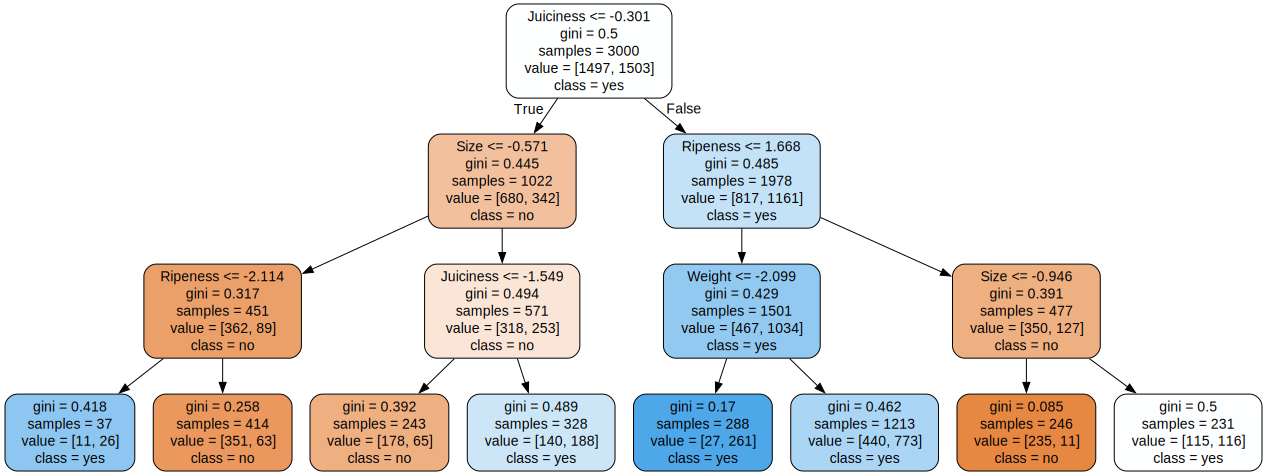

In [15]:
features = X.columns

dot_data = export_graphviz(model2, out_file = None,
                           feature_names = features,
                          filled = True,
                           rounded = True,
                          class_names = ['no','yes'])
graph = graphviz.Source(dot_data)
graph
